In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from inference_sdk import InferenceHTTPClient

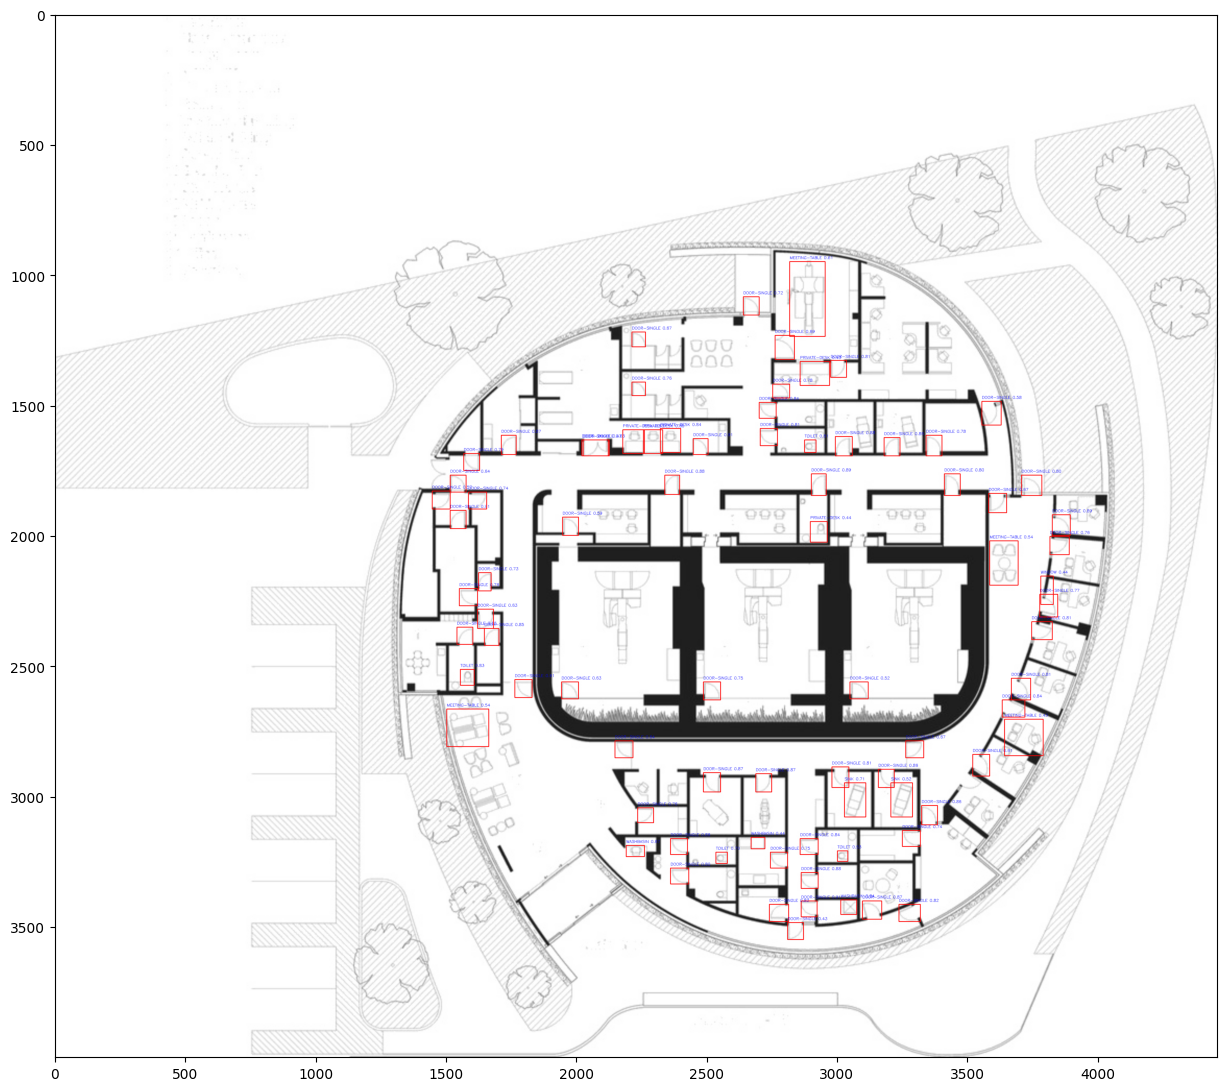

In [6]:
# your_image = 'assets/images/hospital_1_black.jpg'
your_image = 'assets/images/hospital_1_mask_upscaled.jpg'
# your_image = 'assets/images/hospital_1_upscaled_sharpened.jpg'



CLIENT = InferenceHTTPClient(
    api_url="https://outline.roboflow.com",
    api_key="mQL45QHB1lZ19v2mKuf1"
)

results = CLIENT.infer(your_image, model_id="full-set-menu/5")

orig_image = cv2.imread(your_image)

# Convert the image from BGR to RGB
img = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

# Plot the predicted results
for prediction in results['predictions']:
    # example of box: {'x': 252.5, 'y': 431.5, 'width': 23.0, 'height': 27.0, 'confidence': 0.9059154391288757, 'class': 'door', 'class_id': 0, 'detection_id': '6f2b0c12-51f0-47f2-afe3-7a0a5897bc82'}

    x1 = int(prediction['x'] - prediction['width'] / 2)
    y1 = int(prediction['y'] - prediction['height'] / 2)
    x2 = int(prediction['x'] + prediction['width'] / 2)
    y2 = int(prediction['y'] + prediction['height'] / 2)

    label = f"{prediction['class']} {prediction['confidence']:.2f}"

    # Draw the bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Draw the label
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Plot the image with bounding boxes
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.show()